In [10]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


import numpy as np

def sigmoid(x):
 return 1/(1 + np.exp(-x))

In [21]:



pqr_agrs_100_30k = pd.read_csv('../../runs/cass_ALL_520/scalarOut/merge_checkers_mcts_LP.csv', header = 3)

In [22]:
pqr_agrs_100_30k

,wall_time,step,run/total_games,run/total_wins,run/total_reward,run/length
0,1.621520e+09,17,109,30,1,42
1,1.621520e+09,59,111,31,1,27
2,1.621520e+09,86,113,31,-1,42
3,1.621520e+09,128,115,32,1,23
4,1.621520e+09,151,117,32,-1,45
...,...,...,...,...,...,...
4341,1.622660e+09,99820,4324,1095,1,59
4342,1.622660e+09,99866,4326,1096,1,46
4343,1.622660e+09,99940,4328,1097,1,74
4344,1.622660e+09,99962,4330,1098,1,22


In [23]:
pqr_agrs_100_30k.sort_values(by='step', inplace=True)

step_sums = dict()
# {key: (reward_sum, count, length_of_run) }

for index, row, in pqr_agrs_100_30k.iterrows():
    step = row['step']

    if step in step_sums:
        # adding rewards for the step
        step_sums[step][0] += row['run/total_reward']
        step_sums[step][1] += 1
        step_sums[step][2] += row['run/length']
    else:
        step_sums[step] = [0, 1, row['run/length']]
        step_sums[step][0] += row['run/total_reward']


# take average reward and length at each saved step
df_av_at_step = pd.DataFrame(columns=['step', 'reward', 'length'])


for key, value in step_sums.items():

    mean_reward = value[0] / value[1]
    mean_length = value[2] / value[1]


    df_av_at_step = df_av_at_step.append({'step': key, 'reward': mean_reward, 'length': mean_length}, ignore_index=True)
df_av_at_step.set_index('step')


rolling = df_av_at_step.ewm(adjust = True, span=1000).mean()
rolling_se = df_av_at_step.ewm(adjust = True, span = 1000).std()
rolling

df_av_at_step['reward'] = (rolling['reward']/2) + .5
df_av_at_step['reward_se'] = rolling_se['reward']
df_av_at_step['length_se'] = rolling_se['length']
df_av_at_step['length'] = rolling['length']

df_av_at_step = df_av_at_step.fillna(0);df_av_at_step
eval_pooledThirds = df_av_at_step
eval_pooledThirds


,step,reward,length,reward_se,length_se
0,17.0,1.000000,42.000000,0.000000,0.000000
1,59.0,1.000000,34.492500,0.000000,10.606602
2,86.0,0.666000,37.000007,1.155278,8.660257
3,128.0,0.749751,33.489498,1.000333,9.952289
4,151.0,0.599200,35.800816,1.095810,10.039401
...,...,...,...,...,...
4284,99820.0,0.506474,39.609639,0.998892,21.171506
4285,99866.0,0.507460,39.622409,0.998867,21.152268
4286,99940.0,0.508445,39.691109,0.998839,21.186876
4287,99962.0,0.509427,39.655755,0.998807,21.180450


In [24]:

pqr_agrs_100_30k = pd.read_csv('../../runs/cass_ALL_520/scalarOut/merge_checkers_mcts_noLP.csv', header = 2)

In [25]:
pqr_agrs_100_30k

,wall_time,step,run/total_games,run/total_wins,run/total_reward,run/length
0,1.621520e+09,18,2.0,1.0,1.0,18.0
1,1.621520e+09,57,4.0,2.0,1.0,39.0
2,1.621520e+09,95,6.0,2.0,-1.0,37.0
3,1.621520e+09,133,8.0,3.0,1.0,38.0
4,1.621520e+09,164,10.0,4.0,1.0,31.0
...,...,...,...,...,...,...
4395,1.622660e+09,99799,4323.0,1067.0,-1.0,59.0
4396,1.622660e+09,99858,4325.0,1067.0,-1.0,46.0
4397,1.622660e+09,99904,4327.0,1067.0,-1.0,74.0
4398,1.622660e+09,99978,4329.0,1067.0,-1.0,22.0


In [26]:
pqr_agrs_100_30k.sort_values(by='step', inplace=True)

step_sums = dict()
# {key: (reward_sum, count, length_of_run) }

for index, row, in pqr_agrs_100_30k.iterrows():
    step = row['step']

    if step in step_sums:
        # adding rewards for the step
        step_sums[step][0] += row['run/total_reward']
        step_sums[step][1] += 1
        step_sums[step][2] += row['run/length']
    else:
        step_sums[step] = [0, 1, row['run/length']]
        step_sums[step][0] += row['run/total_reward']


# take average reward and length at each saved step
df_av_at_step = pd.DataFrame(columns=['step', 'reward', 'length'])


for key, value in step_sums.items():

    mean_reward = value[0] / value[1]
    mean_length = value[2] / value[1]


    df_av_at_step = df_av_at_step.append({'step': key, 'reward': mean_reward, 'length': mean_length}, ignore_index=True)
df_av_at_step.set_index('step')


rolling = df_av_at_step.ewm(adjust = True, span=1000).mean()
rolling_se = df_av_at_step.ewm(adjust = True, span = 1000).std()
rolling

# center at 50 and divide space by 2 to put between 0 and 1
df_av_at_step['reward'] = (rolling['reward']/2) + .5
df_av_at_step['reward_se'] = rolling_se['reward']
df_av_at_step['length_se'] = rolling_se['length']
df_av_at_step['length'] = rolling['length']

df_av_at_step = df_av_at_step.fillna(0);df_av_at_step
eval_pooled = df_av_at_step
eval_pooled



,step,reward,length,reward_se,length_se
0,18.0,1.000000,18.000000,0.000000,0.000000
1,57.0,1.000000,28.510500,0.000000,14.849242
2,95.0,0.666000,31.345995,1.155278,11.583939
3,133.0,0.749751,33.014490,1.000333,10.022975
4,164.0,0.800001,32.609979,0.894427,8.722596
...,...,...,...,...,...
4339,99799.0,0.494094,39.824960,0.997992,21.080372
4340,99858.0,0.493107,39.837300,0.997972,21.061106
4341,99904.0,0.492121,39.905569,0.997948,21.095348
4342,99978.0,0.491138,39.869787,0.997919,21.089440


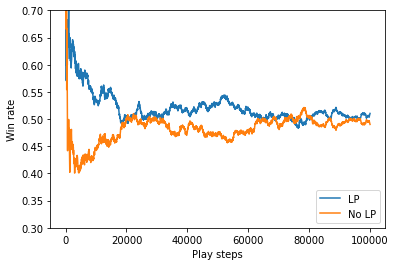

In [27]:
import itertools
marker = itertools.cycle((',', '+', 'o', '*'))


fig, axs = plt.subplots(ncols=1)
#plt.title('Mine Recycler, Fixed 10x10')
#sns.lineplot(x="step", y="reward", data=eval_LP3_DFA ,ax=axs, ci=99, )
col=sns.color_palette("tab10")
#sns.lineplot(x="step", y="reward", data=eval_LP3_DFA,ax=axs, ci=99,
 #            )
sns.lineplot(x="step", y="reward", data=eval_pooledThirds,ax=axs, ci=99,
             )

sns.lineplot(x="step", y="reward", data=eval_pooled,ax=axs, ci=99,
             )
#axs.fill_between(x=eval_pooledThirds["step"], y1=eval_pooledThirds["reward"] + eval_pooledThirds["reward_se"],
#                y2=eval_pooledThirds["reward"] - eval_pooledThirds["reward_se"], alpha=.5)
#axs.fill_between(x=eval_pooled["step"], y1=eval_pooled["reward"] + eval_pooled["reward_se"],
#                 y2=eval_pooled["reward"] - eval_pooled["reward_se"], alpha=.5)
#axs.fill_between(x=df_no_lp_no_dfa["step"], y1=df_no_lp_no_dfa["reward"] + df_no_lp_no_dfa["reward_se"],
#                 y2=df_no_lp_no_dfa["reward"] - df_no_lp_no_dfa["reward_se"], alpha=.5)
axs.set(xlabel='Play steps', ylabel='Win rate', ylim=(0.3, 0.7))
#plt.title('Go - Evaluation post 100k steps self-play training per checkpoint')

axs.legend(['LP','No LP'], loc=4)


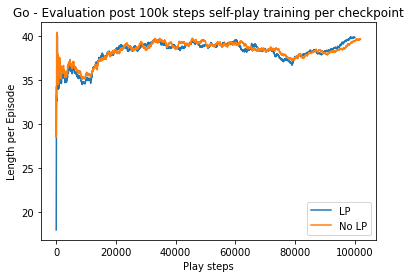

In [18]:
fig, axs = plt.subplots(ncols=1)
#plt.title('Mine Recycler, Fixed 10x10')

sns.lineplot(x="step", y="length", data=eval_pooled,ax=axs, ci=99,
             )

sns.lineplot(x="step", y="length", data=eval_pooledThirds,ax=axs, ci=99,
             )
axs.set(xlabel='Play steps', ylabel='Length per Episode')
plt.title('Go - Evaluation post 100k steps self-play training per checkpoint')

axs.legend(['LP', 'No LP'], loc=4)

